In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dss
from sklearn.metrics.pairwise import euclidean_distances as distances
from scipy.spatial.distance import euclidean
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

In [3]:
cd ../src/

/home/meni/Documents/PyCharm/pydp/src


In [4]:
import cluster as cl
import good_center as gc
import good_radius as gr
import jl

In [5]:
sample_number = 1000
dim = 3
blobs = dss.make_blobs(sample_number, n_features=dim ,cluster_std=3)
blob = blobs[0]
# plt.scatter(*zip(*blob))

In [6]:
ds = distances(blob)
np.median(ds)

9.2268355063677525

In [7]:
domain = (0,50)
desired_amount_of_points, approximation, failure, eps, delta, promise = 500, 0.1, 0.1, 0.5, 2**-10, 40

In [12]:
radius, center = cl.find(blob, dim, domain, desired_amount_of_points, approximation, failure, eps, delta, promise)

In [13]:
ball = [p for p in blob if euclidean(p, center) <= radius]
blob = [p for p in blob if tuple(p) not in map(tuple, ball)]

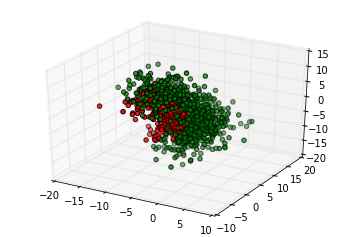

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
zipped_data = zip(*blob)
ax.scatter(*zipped_data, c='g')
zipped_ball = zip(*ball)
ax.scatter(*zipped_ball, c='r')

In [16]:
print "Good-radius: %d" % radius
print "Good-center: %s" % str(center)
print "Desired number of points in resulting ball: %d" % desired_amount_of_points
print "Number of points in the resulting ball: %d" % len(ball)

Good-radius: 9
Good-center: [-11.17283827   3.69685786  -3.21182035]
Desired number of points in resulting ball: 500
Number of points in the resulting ball: 384
